In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tf_mcc import MCC

In [3]:
# load training and validation sets

X_train = pd.read_csv("dataset/X_train.csv")
X_val = pd.read_csv("dataset/X_val.csv")
y_train = pd.read_csv("dataset/y_train.csv")
y_val = pd.read_csv("dataset/y_val.csv")

# load test set
X_test = pd.read_csv("dataset/X_test.csv")
y_test = pd.read_csv("dataset/y_test.csv")

In [4]:
X_train = X_train['title'].values
X_val = X_val['title'].values
X_test = X_test['title'].values

y_train = y_train['classification'].values
y_val = y_val['classification'].values
y_test = y_test['classification'].values

In [6]:
# model parameters
vocabulary_size = 10000 # maximum vocabulary size (max_features, maximum number of tokens)
max_len = 250 # sequence length to pad the outputs to
embedding_dim = 16

# create vocab layer
# instantiate the text vectorization layer
vectorize_layer = TextVectorization(max_tokens = vocabulary_size, 
                                    standardize = "lower_and_strip_punctuation", 
                                    output_mode = "int", 
                                    output_sequence_length = max_len)

# build the vocabulary
# vectorization layer that generates a tensor of shape (batch_size, max_len) containing vocabulary indices
vectorize_layer.adapt(X_train)

# vectorize_layer.get_vocabulary()
# vectorize_layer.vocabulary_size()

In [7]:
train_text = vectorize_layer(X_train)
val_text = vectorize_layer(X_val)
test_text = vectorize_layer(X_test)

In [8]:
train_text.shape

TensorShape([26562, 250])

In [9]:
test_text.shape

TensorShape([8855, 250])

In [10]:
model = Sequential([
    tf.keras.Input(shape = (250,), dtype = tf.int64),
    layers.Embedding(vocabulary_size + 1, embedding_dim),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(units = 1, activation = "sigmoid") # revise the use of this layer
]
)

In [11]:
model.save("model/GAP_1D")

INFO:tensorflow:Assets written to: model/GAP_1D/assets


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 16)           160016    
                                                                 
 dropout (Dropout)           (None, 250, 16)           0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
__________________________________________________

In [14]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              metrics = [
                  tf.keras.metrics.BinaryAccuracy(),
                  tf.keras.metrics.Precision(),
                  tf.keras.metrics.Recall(),
                  MCC(),
              ],
)


callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 10)


history = model.fit(
        train_text, y_train,
        validation_data = (val_text, y_val),
        epochs = 20,
        callbacks = [callback],
)

Epoch 1/20
831/831 [==============================] - 5s 4ms/step - loss: 0.6763 - binary_accuracy: 0.6293 - precision: 0.7596 - recall: 0.3363 - mcc: 0.2898 - val_loss: 0.6430 - val_binary_accuracy: 0.7034 - val_precision: 0.9949 - val_recall: 0.4011 - val_mcc: 0.4998
Epoch 2/20
831/831 [==============================] - 3s 4ms/step - loss: 0.5782 - binary_accuracy: 0.8849 - precision: 0.9006 - recall: 0.8553 - mcc: 0.7700 - val_loss: 0.5024 - val_binary_accuracy: 0.9119 - val_precision: 0.9078 - val_recall: 0.9144 - val_mcc: 0.8238
Epoch 3/20
831/831 [==============================] - 3s 4ms/step - loss: 0.4414 - binary_accuracy: 0.9118 - precision: 0.8944 - recall: 0.9260 - mcc: 0.8240 - val_loss: 0.3836 - val_binary_accuracy: 0.9124 - val_precision: 0.9351 - val_recall: 0.8838 - val_mcc: 0.8258
Epoch 4/20
831/831 [==============================] - 3s 4ms/step - loss: 0.3403 - binary_accuracy: 0.9221 - precision: 0.9027 - recall: 0.9395 - mcc: 0.8450 - val_loss: 0.2986 - val_binary_

In [13]:
history.history

{'loss': [0.6791540384292603,
  0.5863025188446045,
  0.44895297288894653,
  0.3444603681564331,
  0.27586829662323,
  0.2299448847770691,
  0.19844463467597961,
  0.17451214790344238,
  0.1567309945821762,
  0.1421961486339569,
  0.13084259629249573,
  0.12099307030439377,
  0.11243470758199692,
  0.10510705411434174,
  0.09920143336057663,
  0.09402090311050415,
  0.08993085473775864,
  0.08565905690193176,
  0.0812714546918869,
  0.07843409478664398],
 'binary_accuracy': [0.6160303950309753,
  0.8701152205467224,
  0.9116407036781311,
  0.9215043783187866,
  0.9286951422691345,
  0.9372035264968872,
  0.941758930683136,
  0.9478201866149902,
  0.9514343738555908,
  0.9548979997634888,
  0.9558015465736389,
  0.9593780636787415,
  0.9615240097045898,
  0.9641216993331909,
  0.9659287929534912,
  0.9676605463027954,
  0.9690535068511963,
  0.9705970883369446,
  0.9715383052825928,
  0.9737971425056458],
 'precision': [0.8100719451904297,
  0.9012292623519897,
  0.8938868045806885,
  0

In [14]:
epochs = history.epoch

In [15]:
range(1, max(history.epoch) + 2)

range(1, 21)

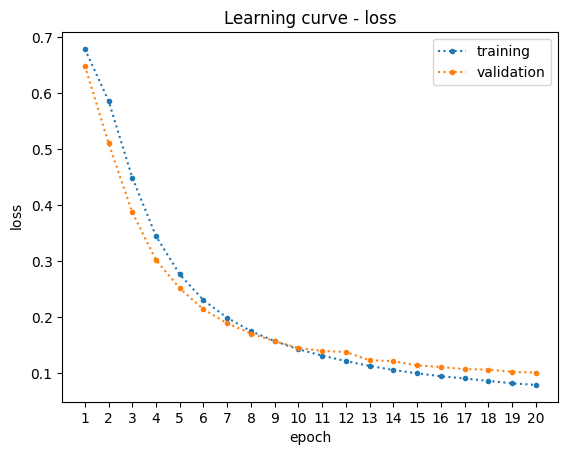

In [16]:
plt.plot(range(1, max(epochs) + 2), history.history['loss'], ".:")
plt.plot(range(1, max(epochs) + 2), history.history['val_loss'], ".:")

plt.title('Learning curve - loss')
plt.legend(['training', 'validation'], loc = "best")
plt.ylabel(r"$\mathrm{loss}$")
plt.xlabel("epoch")
plt.xticks(range(1, max(epochs) + 2))
plt.show()

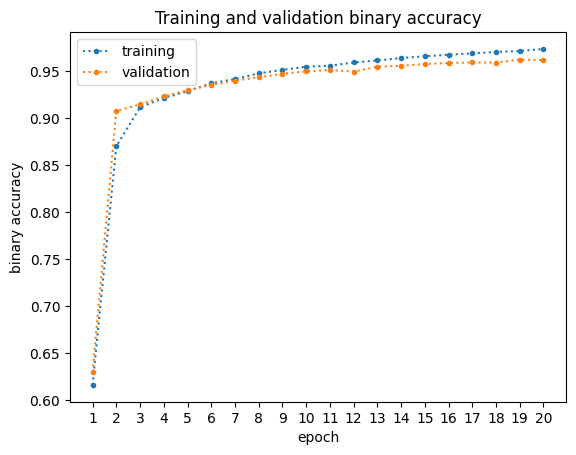

In [17]:
plt.plot(range(1, max(epochs) + 2), history.history['binary_accuracy'], ".:")
plt.plot(range(1, max(epochs) + 2), history.history['val_binary_accuracy'], ".:")

plt.title('Training and validation binary accuracy')
plt.legend(['training', 'validation'], loc = "best")
plt.ylabel("binary accuracy")
plt.xlabel("epoch")
plt.xticks(range(1, max(epochs) + 2))
plt.show()

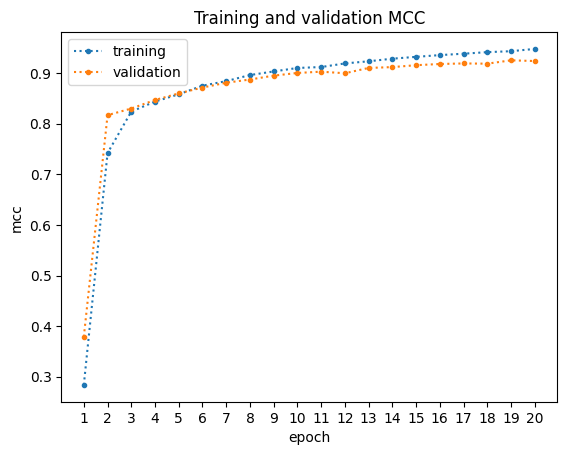

In [18]:
plt.plot(range(1, max(epochs) + 2), history.history['mcc'], ".:")
plt.plot(range(1, max(epochs) + 2), history.history['val_mcc'], ".:")

plt.title('Training and validation MCC')
plt.legend(['training', 'validation'], loc = "best")
plt.ylabel("mcc")
plt.xlabel("epoch")
plt.xticks(range(1, max(epochs) + 2))
plt.show()

###### model performance on the test set

In [19]:
y_pred = model.predict(test_text)

277/277 [==============================] - 0s 1ms/step


In [20]:
y_pred.shape

(8855, 1)

In [21]:
y_pred > 0.5

array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [22]:
evaluation = model.evaluate(x = test_text, y = y_test, return_dict = True)

277/277 [==============================] - 0s 1ms/step - loss: 0.0999 - binary_accuracy: 0.9641 - precision: 0.9614 - recall: 0.9641 - mcc: 0.9281


In [23]:
evaluation.items()

dict_items([('loss', 0.09994752705097198), ('binary_accuracy', 0.9640880823135376), ('precision', 0.9613854289054871), ('recall', 0.9640929102897644), ('mcc', 0.9280852675437927)])

In [24]:
for metric, value in evaluation.items():
    print(f"{metric}: {value:.4f}")

loss: 0.0999
binary_accuracy: 0.9641
precision: 0.9614
recall: 0.9641
mcc: 0.9281
